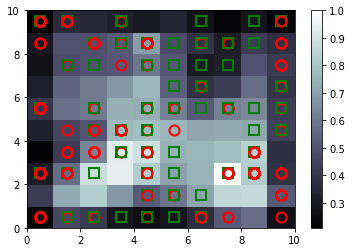

In [15]:
 # Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import ipynb

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom

#input_len=no of columns
#sigma=radius of circle
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)
#we take minimum distance

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
#initialize the figure
bone()
#calculate normalized distance between winning neuron and input vectors

pcolor(som.distance_map().T)
#legend
colorbar()
# 'o' -circle   's' -square
#customer that are non fraudlent are having low mid ie are black whereas whte ones are fraudlent
markers = ['o', 's']
colors = ['r', 'g']
#w contains the coordinates
#circle who doesn't got approval
#square who got approval
#color denote whether they are fraulent or not
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the frauds
mappings = som.win_map(X)
#mapping dict key is coordinates in map list with all the patterns that have been mapped in the position 


(1, 0)

In [16]:

#find the coordinates to who are most likely to be fraudlent ie white ones
frauds = np.concatenate((mappings[(2,7)], mappings[(3,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

#white ones are fraudlents and further study will be done 

In [17]:
frauds

array([[1.5631685e+07, 1.0000000e+00, 2.3170000e+01, 0.0000000e+00,
        2.0000000e+00, 1.3000000e+01, 4.0000000e+00, 8.5000000e-02,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5614813e+07, 1.0000000e+00, 2.0250000e+01, 9.9600000e+00,
        2.0000000e+00, 1.0000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5571081e+07, 1.0000000e+00, 2.2670000e+01, 1.0500000e+01,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.3350000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.0000000e+00],
       [1.5715519e+07, 1.0000000e+00, 2.9920000e+01, 1.8350000e+00,
        2.0000000e+00, 8.0000000e+00, 8.0000000e+00, 4.3350000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,